### Havayolu Yolcu Memnuniyeti - Veri Analizi

Bu proje, Jupyter Notebook ortamında gerçekleştirdiğim analiz sürecini ve Airline Passenger Satisfaction Dataset verisi üzerinde yaptığım veri analizi adımlarını detaylı bir şekilde içermektedir.
Kullanılan veri seti airline_passenger_satisfaction_train.csv olup, proje kapsamında sistematik analizler gerçekleştirilmiştir:

In [332]:
# Gerekli kütüphaneleri ekliyorum
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Veri setini yüklüyorum
df = pd.read_csv('../data/airline-passenger-satisfaction-train.csv')

# İlk 5 satırı inceliyorum
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Veri setindeki her satır, bir yolcunun uçuş deneyimini temsil ediyor. Cinsiyet, yaş, müşteri tipi, seyahat amacı (iş/kişisel), uçuş sınıfı gibi bilgiler yer alıyor. Ayrıca wifi, temizlik, bagaj gibi birçok hizmet ayrı ayrı 0-5 arasında puanlanmış. "satisfaction" değişkeni yolcunun memnuniyetini gösteriyor ve bu sınıflandırma problemleri için hedef değişken olarak kullanılabilir. Genel olarak veri, hem detaylı hem de analiz ve modelleme için oldukça elverişli.

In [334]:
df.shape

(103904, 25)

In [335]:
df['id'].duplicated().sum()  # Tekrar eden id var mı yoksa hepsi farklı mı diye kontrol ettim

0

Unnamed sütunu ve id sütunu tekrar eden veri içermediğinden analiz açısından anlamlı değil. Bu nedenle bu iki sütunu veri setinden çıkarılıyor.

In [337]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

In [338]:
df.describe().T  #  Sayısal değişkenlerin özet istatistiklerini aldım. .T sayesinde tabloyu döndürerek daha okunaklı hale getirdim.

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


Sayısal değişkenler incelendiğimizde;

Yaş: Yolcuların yaşı 7 ile 85 arasında, ortalama ise 39.4. Veri setimiz geniş bir yaş aralığı içeriyor.
Uçuş Mesafesi: Ortalama 1189 km. Minimum 31, maksimum 4983 km ile hem kısa hem uzun uçuşlar mevcut.
Hizmet Skorları (0-5 arası): Wi-Fi, temizlik, yemek gibi hizmetlerin puanları genelde 3-3.6 arasında. Yani yolcuların çoğu ne çok memnun ne de çok memnuniyetsiz. En düşük ortalama puan 2.72 ile Wi-Fi hizmetinde görülüyor.
Gecikmeler: Kalkış gecikmesi ortalama 14.8 dakika, varış gecikmesi 15.1 dakika. Ama maksimum değerler 1500 dakikayı aşıyor, bu da aykırı değerler olduğunu gösteriyor.

*** EKSİK DEĞER ANALİZİ ***

In [341]:
# Eksik verileri analiz ediyorum burada birinci sütunda sayısını ikinci sütunda oranını inceleyeceğim.
missing_report = pd.DataFrame({
    "Missing Values": df.isnull().sum(),
    "Missing Percentage (%)": df.isnull().mean() * 100
}).sort_values(by="Missing Values", ascending=False)

missing_report

,Missing Values,Missing Percentage (%)
Arrival Delay in Minutes,310,0.298352
Gender,0,0.000000
Seat comfort,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000
Inflight service,0,0.000000
Checkin service,0,0.000000
Baggage handling,0,0.000000
Leg room service,0,0.000000
On-board service,0,0.000000


Veri setimizde eksik değerleri tespit edebilmek için her sütundaki boş gözlem sayısını ve bu boşlukların veri setine oranını incelediğimizde yalnızca "Arrival Delay in Minutes" sütununda eksik değer bulunduğunu gözlemledik:

Eksik Gözlem Sayısı: 310, Eksik Gözlem Oranı: %0.29

Tek bir sütunda, çok da yüksek olmayan bir oranda eksik veri bulunduğu için, bu durum genel analiz sürecini etkilemeyecek şekilde uygun bir yöntemle giderilebilir.

Eksik Verilerle Başa Çıkma Yöntemleri
 - Silme Yöntemleri
1. Satır Bazlı Silme (Listwise Deletion)
Açıklama: Eksik veri içeren satırlar tamamen silinir.

Ne zaman kullanılır? Eksik değer oranı düşükse (%5'ten az).

2. Sütun Bazlı Silme
Açıklama: Eksik değer oranı çok yüksek olan (%75'ten fazla) sütunlar kaldırılır.

Ne zaman kullanılır? Sütun bilgi açısından katkı sağlamıyorsa.

 - Atama (İmputation) Yöntemleri
Sayısal Veriler için:
1. Ortalama ile Doldurma (Mean Imputation)
Açıklama: Eksik değerler, sütunun ortalama değeriyle doldurulur.

Ne zaman kullanılır? Veri dağılımı simetrikse ve eksik oran azsa.

Not: Aykırı değerlere karşı hassastır, varyansı düşürebilir.

2. Medyan ile Doldurma (Median Imputation)
Açıklama: Eksik değerler, sütunun medyan değeriyle doldurulur.

Ne zaman kullanılır? Dağılım çarpıksa veya aykırı değer varsa.

Avantaj: Aykırı değerlere karşı daha dayanıklıdır.

3. İleri / Geriye Doldurma (Forward Fill / Backward Fill)
Açıklama: Eksik değerler, önceki veya sonraki geçerli değerle doldurulur.

Ne zaman kullanılır? Zaman serisi veya sıralı verilerde.

** Hangi yöntemin uygun olduğuna karar vermek için veri dağılımı grafiklerinin inceleyebiliriz.

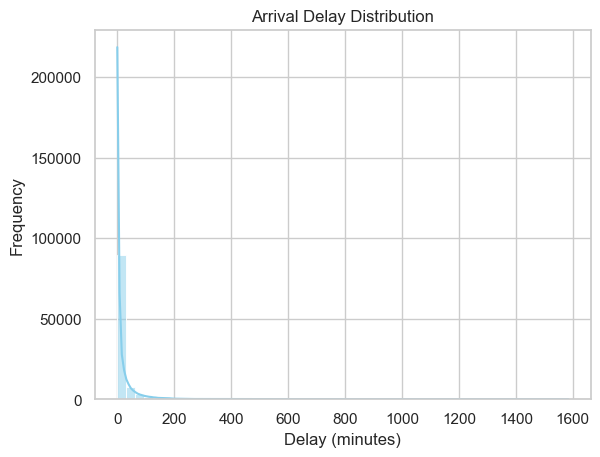

In [344]:
sns.histplot(df['Arrival Delay in Minutes'], kde=True, bins=50, color='skyblue')
plt.title('Arrival Delay Distribution')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

Grafiğe baktığımızda “Arrival Delay in Minutes” değişkeninin dağılımı sağa çarpık. Yani çoğu uçuşta varış gecikmesi 0-50 dakika aralığında yoğunlaşmış, ancak birkaç uçuşta bu süre 1500 dakikaya kadar çıkıyor. Bu da değişkende aykırı değerlerin olduğunu gösteriyor.

Eksik değer oranı düşük (%0.29) olsa da, dağılım simetrik değil ve uç değerler var. Bu yüzden ortalama ile doldurmak yerine, daha sağlam bir yöntem olan medyan ile doldurma tercih edilebilir. Böylece aykırı değerlerin etkisi azaltılmış olur.

In [346]:
# Eksik değerleri medyan ile dolduruyorum
# Arrival Delay in Minutes sütunundaki eksik değer sayısı
print("Eksik değer sayısı (önce):", df["Arrival Delay in Minutes"].isnull().sum())

# Medyan değeri hesapla
median_value = df["Arrival Delay in Minutes"].median()

df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(median_value)
print("Eksik değer sayısı (sonra):", df["Arrival Delay in Minutes"].isnull().sum())

Eksik değer sayısı (önce): 310
Eksik değer sayısı (sonra): 0


*** AYKIRI DEĞER ANALİZİ ***

Aykırı değer tespitinde IQR yöntemini kullanabiliriz. Bu yöntem şu şekilde çalışır:
Q1 (1. çeyrek): Verinin %25’lik alt kısmı | Q3 (3. çeyrek): Verinin %75’lik üst kısmı
IQR: Q3 - Q1 şeklinde hesaplanır
Aykırı değerler, şu sınırların dışına düşen değerlerdir:
Alt sınır: Q1 - 1.5 * IQR | Üst sınır: Q3 + 1.5 * IQR
Bu sınırların dışında kalan gözlemler aykırı değer olarak kabul edilir. Yöntemi tüm sayısal sütunlara uygulayarak her birinde ne kadar aykırı gözlem olduğunu görebiliriz.

In [349]:
# Sayısal Sütunların Belirliyoruz
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
numeric_columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [350]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Aykırı değer sayısını yazdırıyoruz
for column in numeric_columns:
    outliers = detect_outliers(df, column)
    print(f"{column}: {len(outliers)} aykırı değer")

Age: 0 aykırı değer
Flight Distance: 2291 aykırı değer
Inflight wifi service: 0 aykırı değer
Departure/Arrival time convenient: 0 aykırı değer
Ease of Online booking: 0 aykırı değer
Gate location: 0 aykırı değer
Food and drink: 0 aykırı değer
Online boarding: 0 aykırı değer
Seat comfort: 0 aykırı değer
Inflight entertainment: 0 aykırı değer
On-board service: 0 aykırı değer
Leg room service: 0 aykırı değer
Baggage handling: 0 aykırı değer
Checkin service: 12891 aykırı değer
Inflight service: 0 aykırı değer
Cleanliness: 0 aykırı değer
Departure Delay in Minutes: 14529 aykırı değer
Arrival Delay in Minutes: 13954 aykırı değer


Aykırı değer olan sütunlar belirlendi, görselleştirme ile destekleyebiliriz.

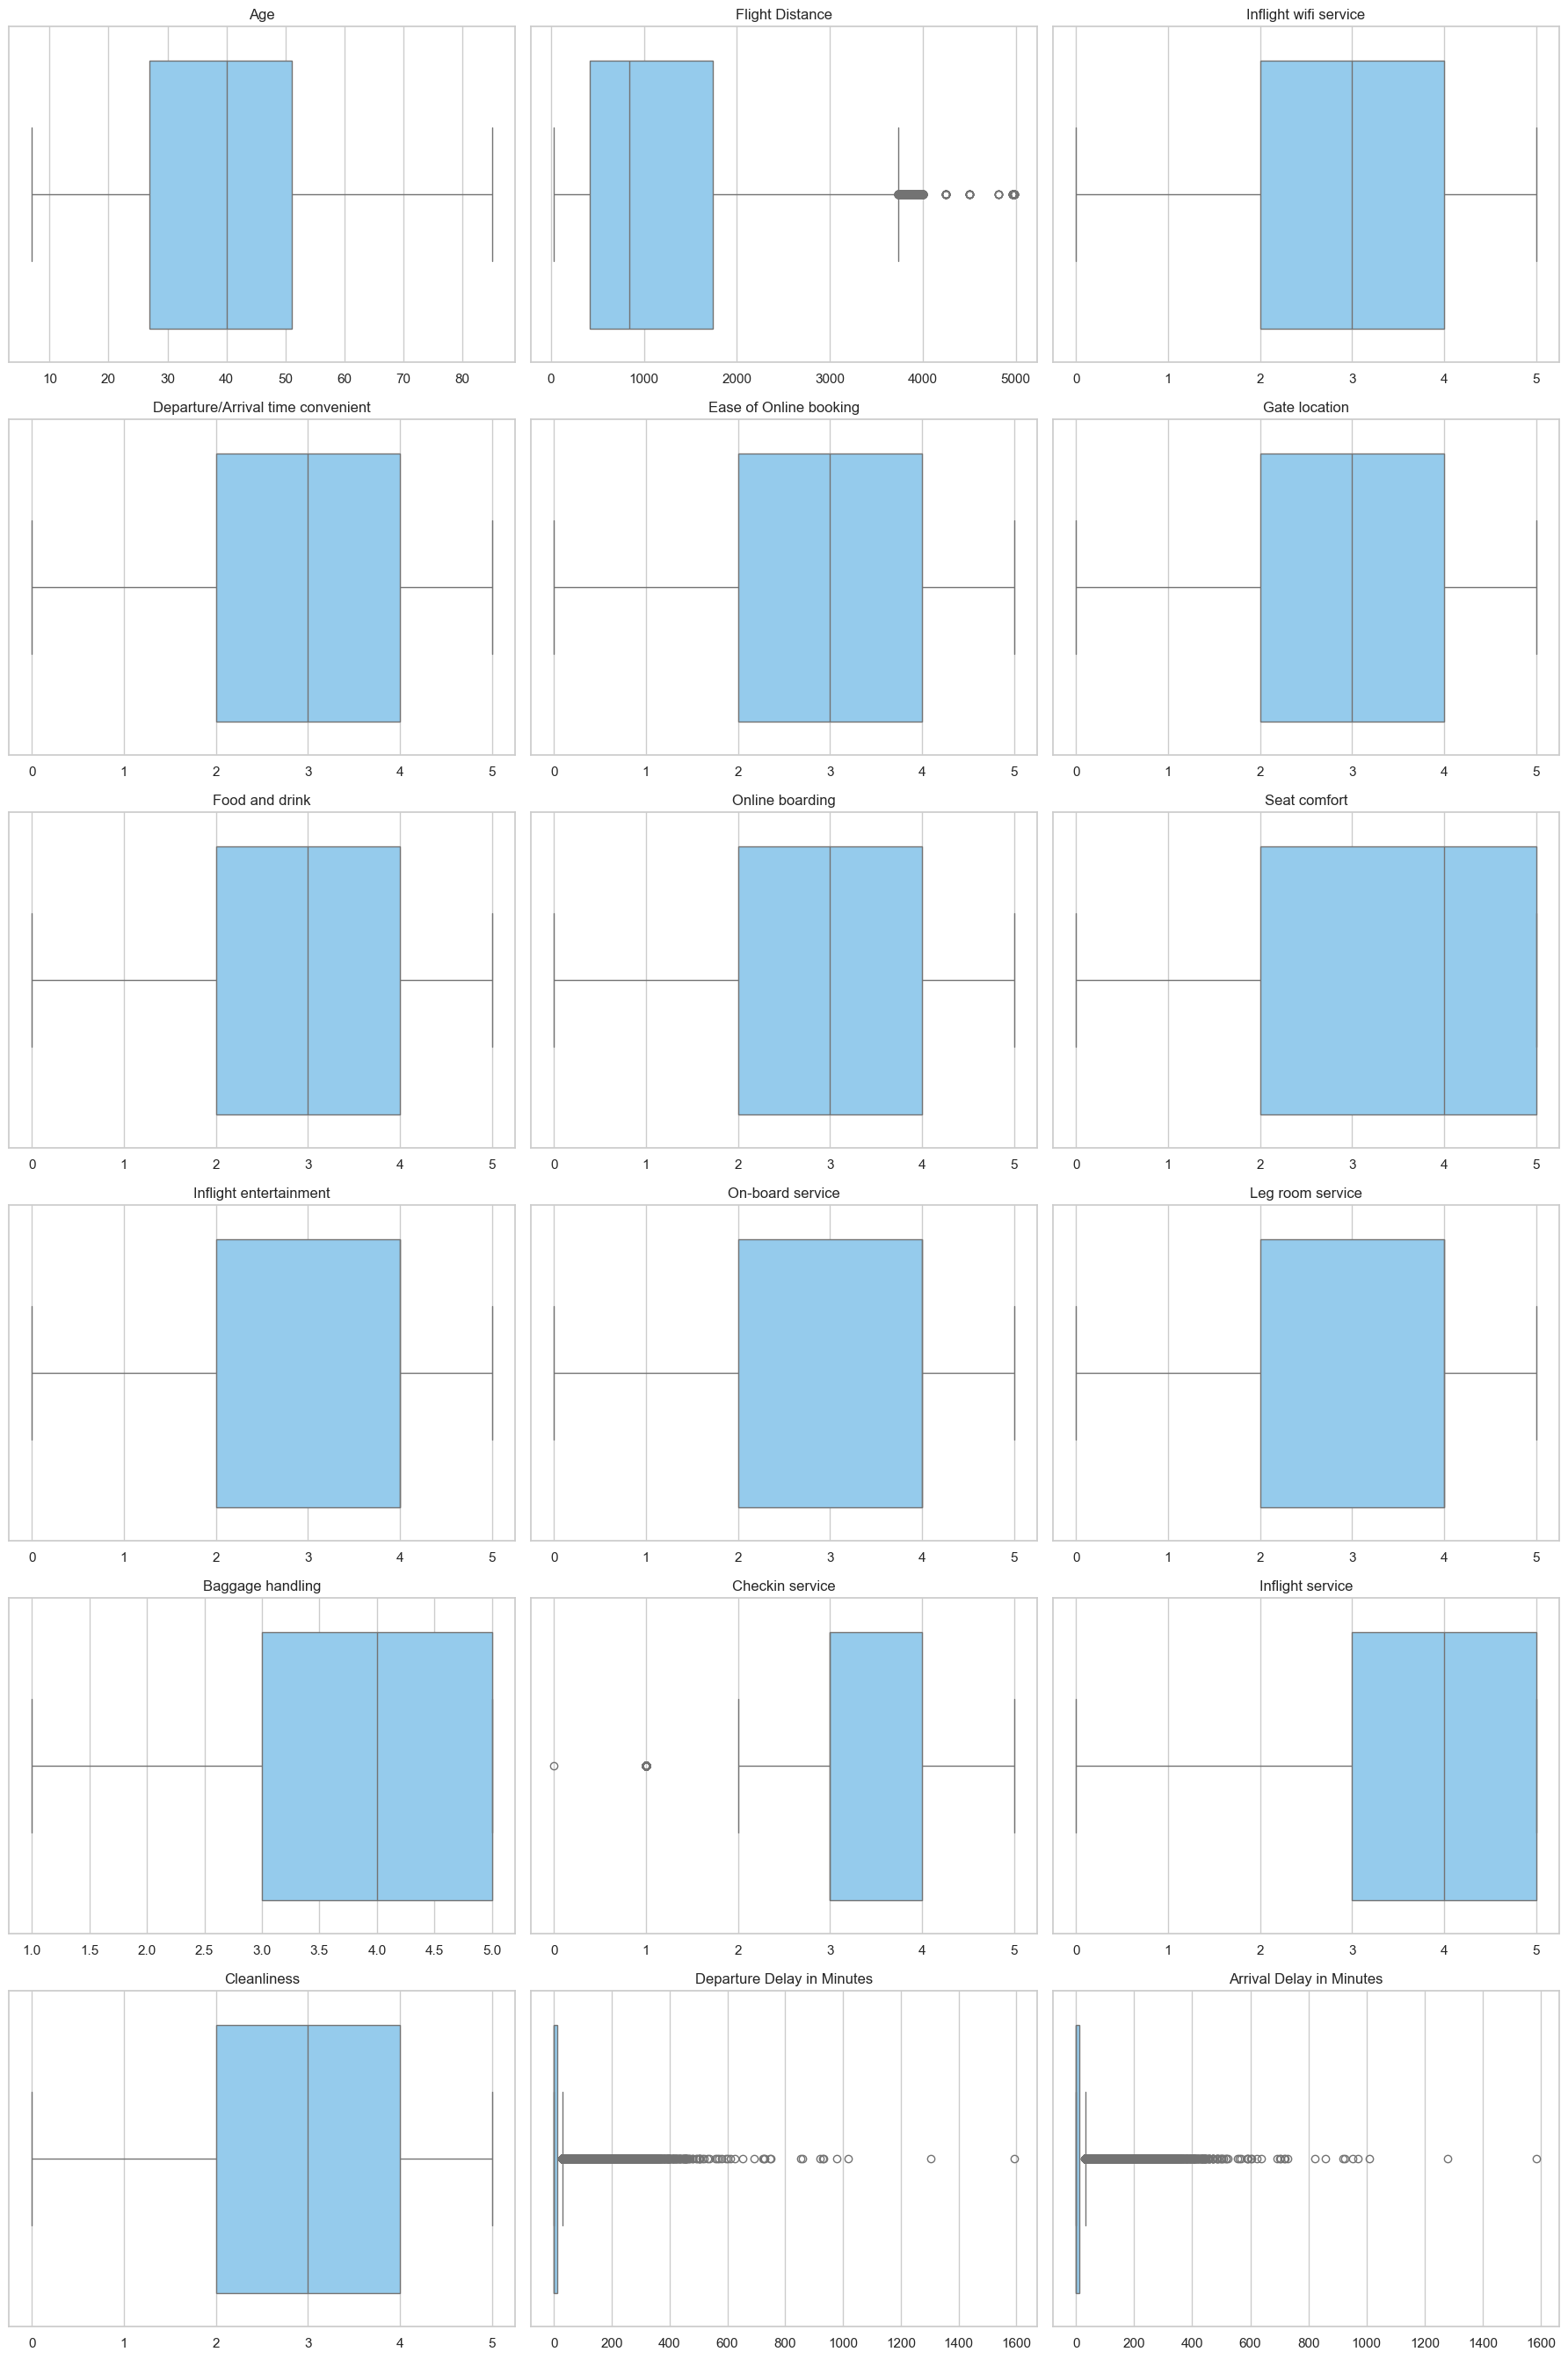

In [352]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(18, len(numeric_columns) * 1.5)) 
sns.set(style="whitegrid")
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i)
    sns.boxplot(data=df, x=column, color="#87CEFA")
    plt.title(column)
    plt.xlabel("")  # X etiketi kaldırılır

plt.tight_layout()
plt.show()


Box Plot Yönteminde de IQR Yöntemi ile aynı sonuçlar elde edilmiştir.

Yaptığımız IQR temelli analiz sonucunda bazı değişkenlerde yoğun aykırı değerler gözlemlenmiştir. Özellikle Flight Distance, Checkin service, Departure Delay in Minutes ve Arrival Delay in Minutes değişkenleri çok sayıda aykırı gözlem içermektedir.

Boxplot görselleri ile bu aykırı değerler görsel olarak da doğrulanmıştır.

Analiz kapsamında bu aykırı değerlere müdahale etmedik, yalnızca tespit edilerek raporladık. 

### Görselleştirme

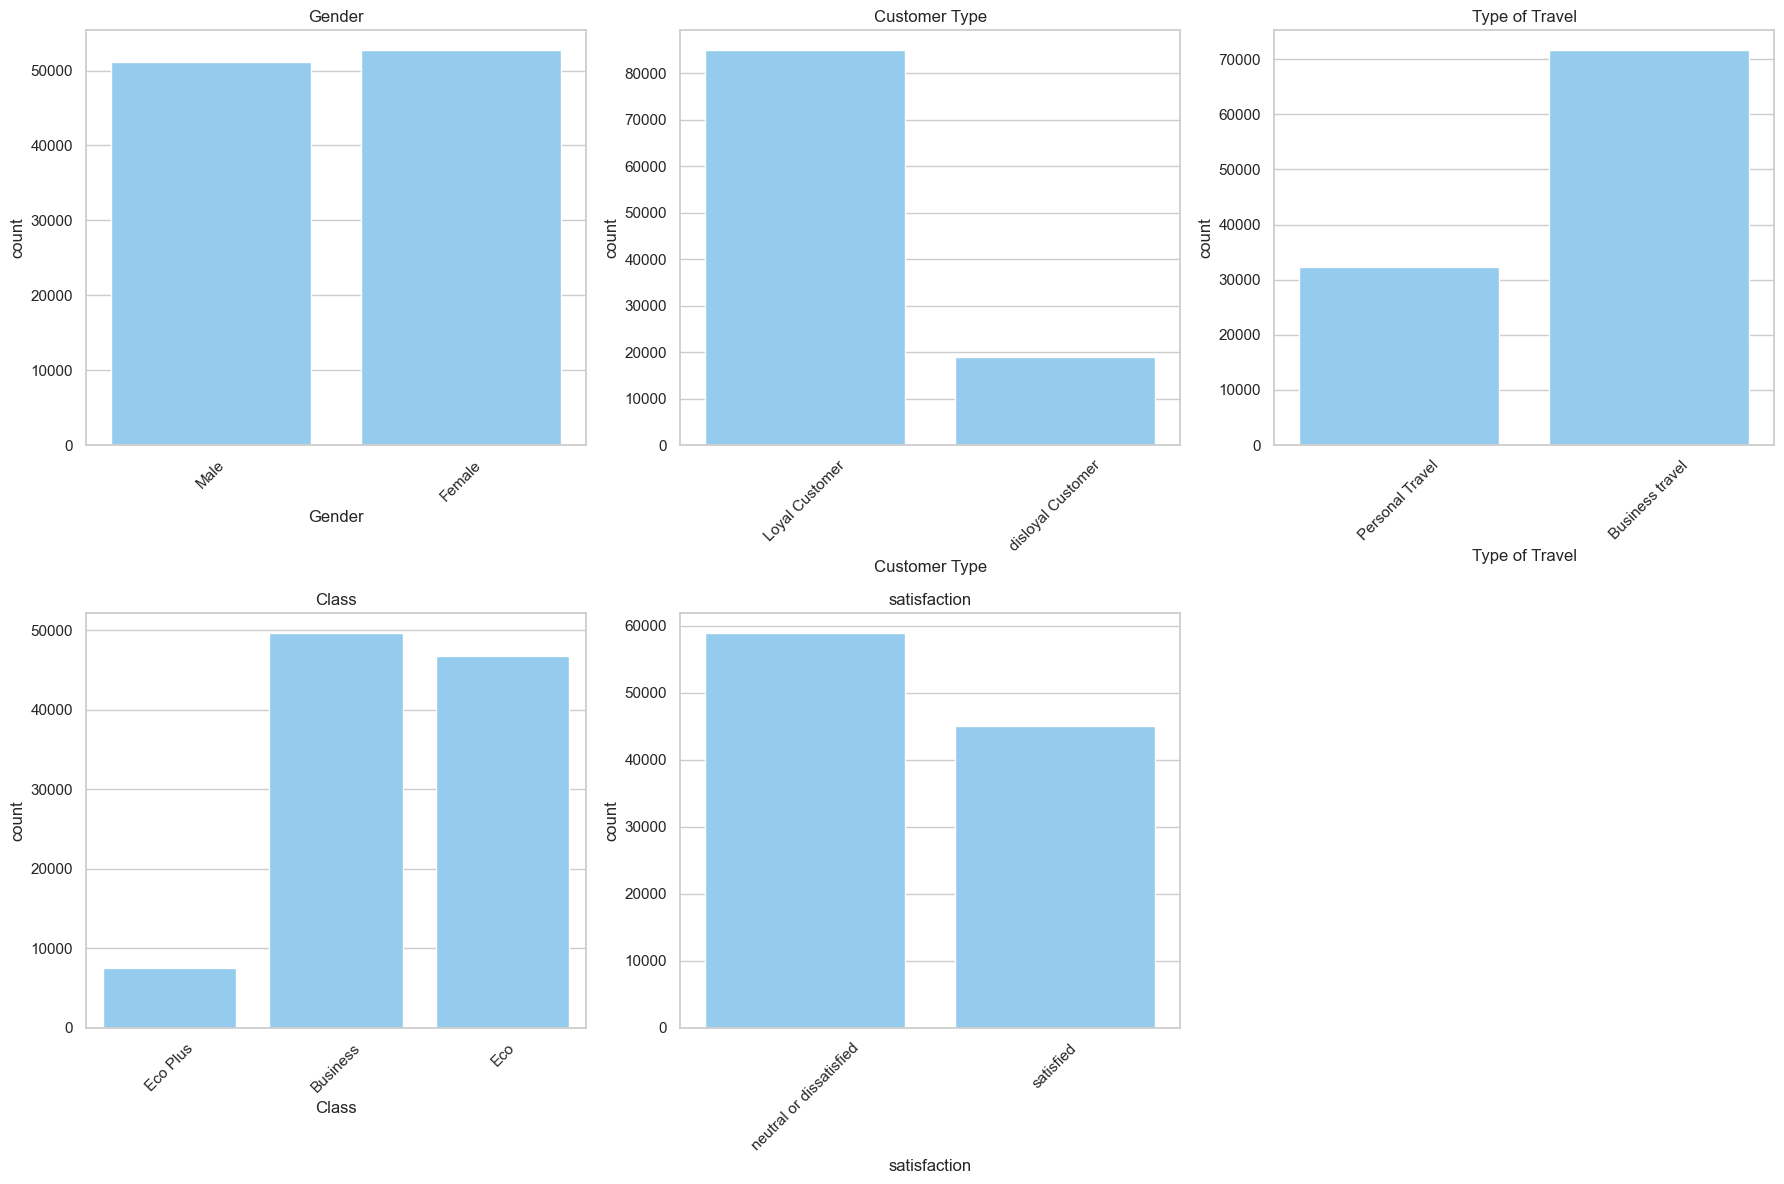

In [356]:
categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_columns

plt.figure(figsize=(18, 12))

for i, column in enumerate(categorical_columns):
    plt.subplot((len(categorical_columns) + 2) // 3, 3, i + 1)
    sns.countplot(data=df, x=column, color="#87CEFA")  # açık mavi
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Kategorik Değişken Analizi – Gender: Kadın ve erkek yolcular neredeyse eşit sayıda temsil edilmiştir. Cinsiyet dağılımı dengelidir.

Customer Type: Büyük çoğunluk Loyal Customer grubunda olduğunu gösterilmektedir.

Type of Travel: Yolcuların çoğu İş Seyahati amacıyla uçmaktadır. Bu, verinin iş amaçlı seyahatlerde yoğunlaştığını gösterir.

Class: Yolcular en çok Business Class ve Eco sınıflarında seyahat etmektedir. Eco Plus sınıfı en az tercih edilen sınıftır.

Satisfaction: Memnun olan yolcu sayısı, memnun olmayanlara göre daha azdır. Bu da genel müşteri deneyiminin pozitif olmadığını gösterir.

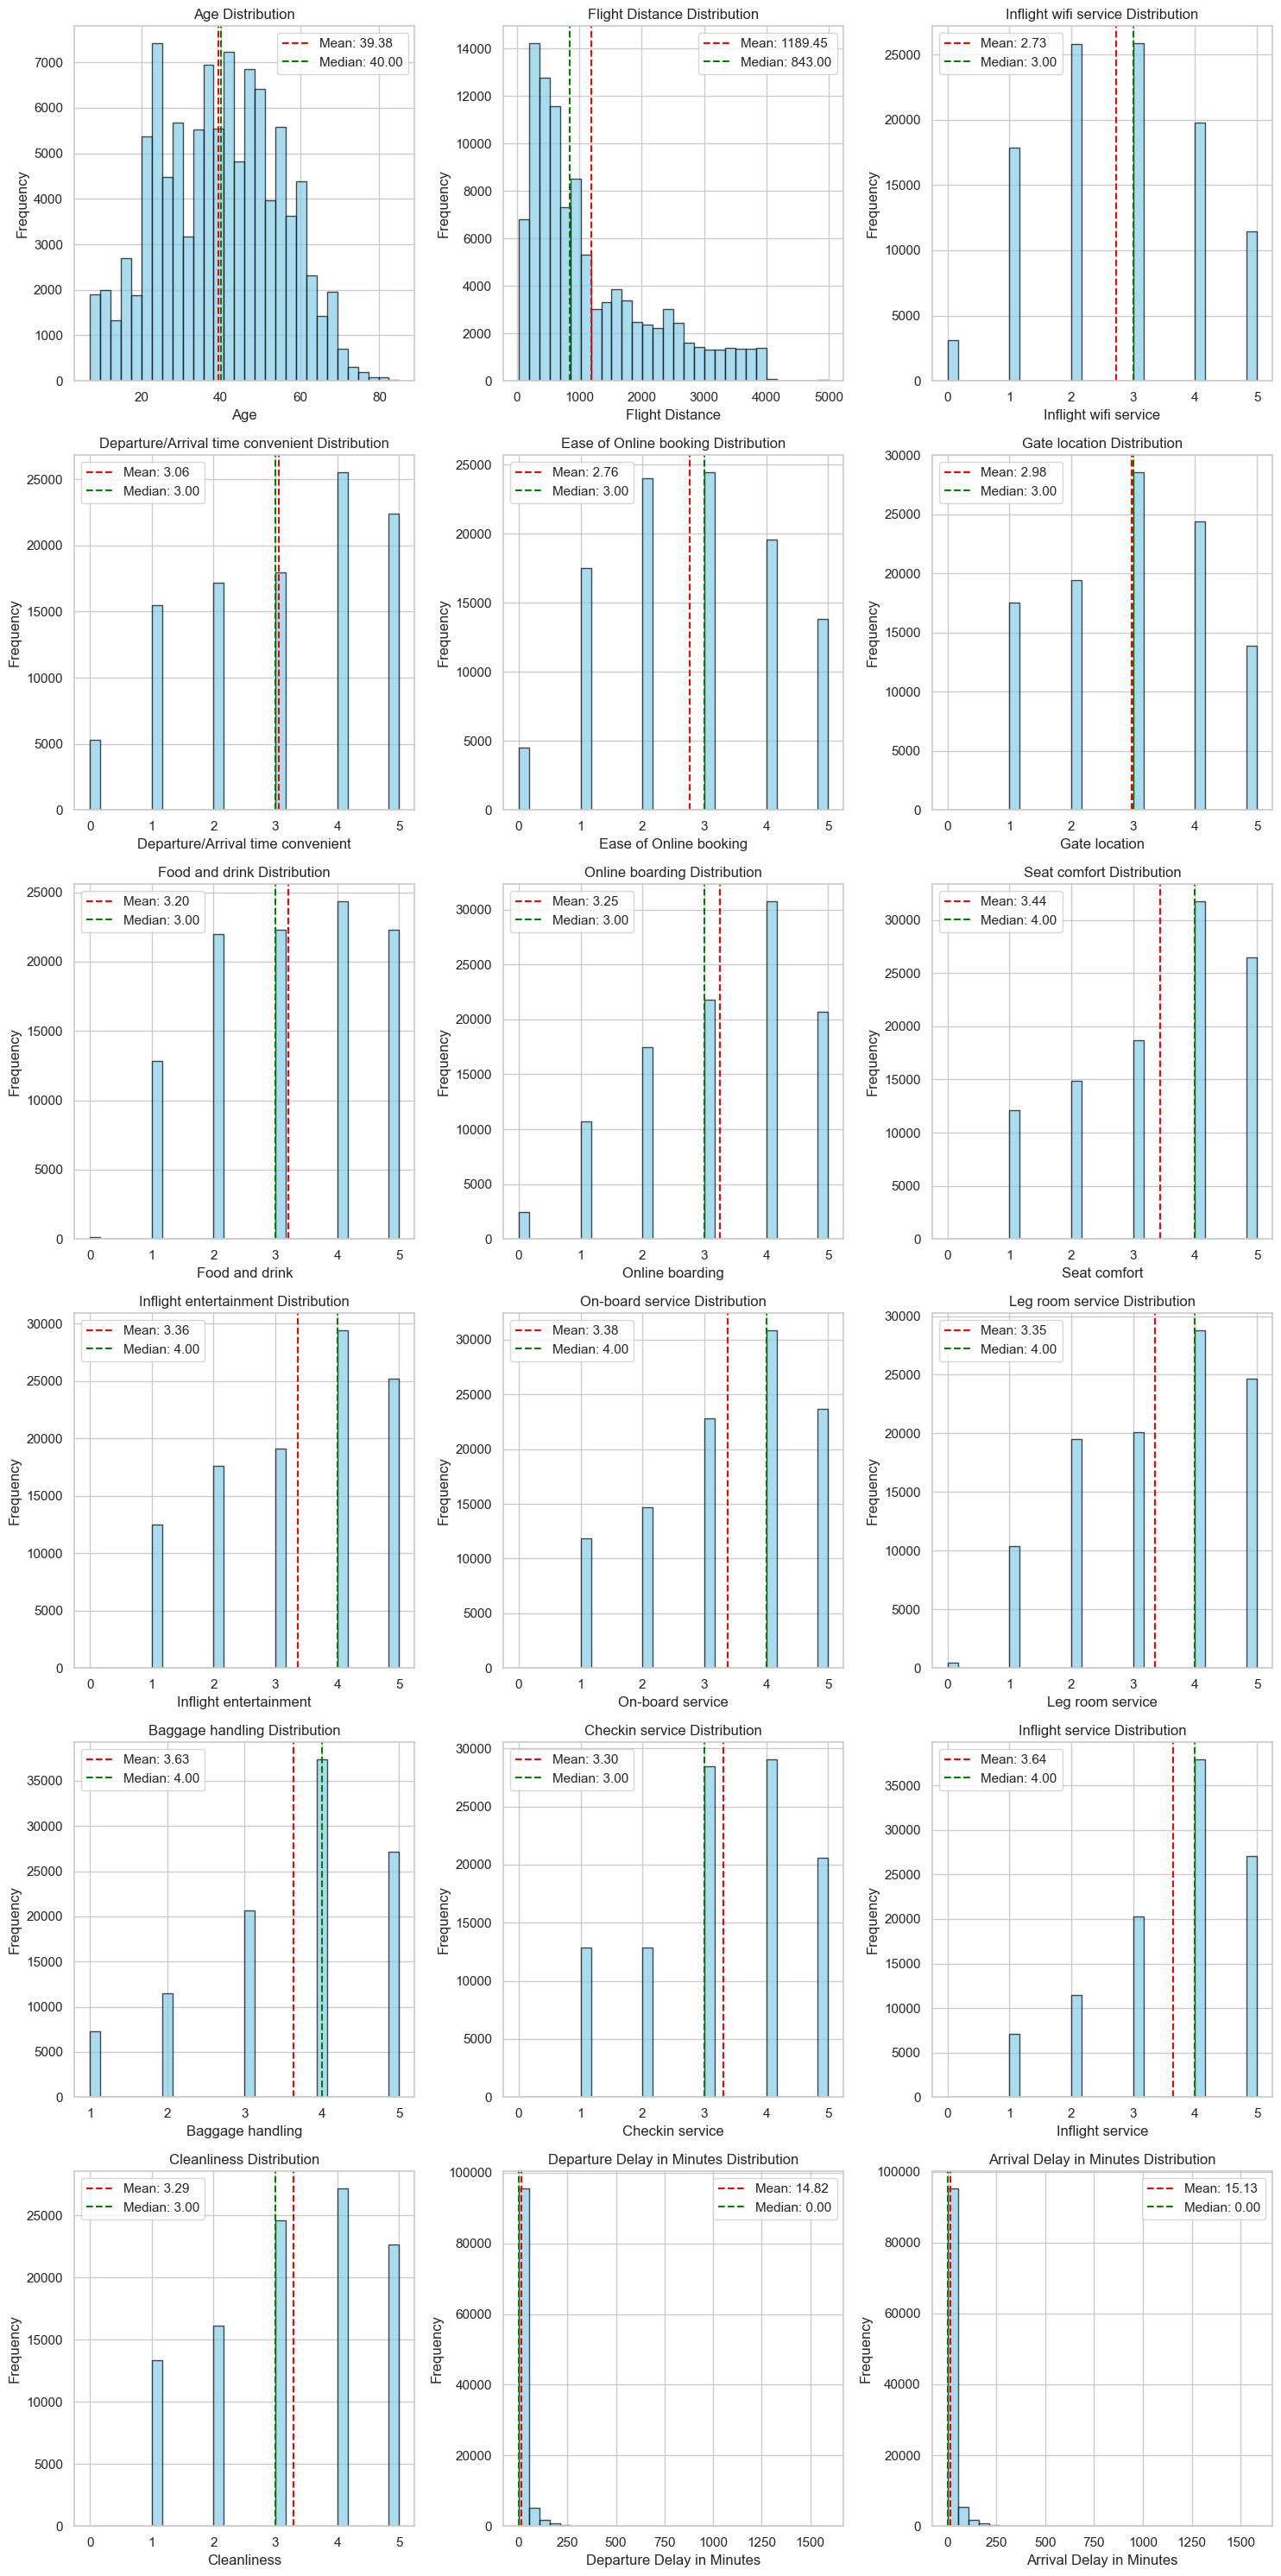

In [358]:
# Sayısal sütunları al
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()


# Satır ve sütun sayısı
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # otomatik hesaplama

plt.figure(figsize=(15, 5 * n_rows))  # grafik alanı

# Her sütun için ayrı grafik
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df[col], bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Ortalama ve medyan çizgileri
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    plt.axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

Dağılım Grafiklerinin Analizi

Yaş Dağılımı: Müşterilerin yaşları yaklaşık olarak normal dağılım göstermektedir. Ortalama yaş 39 civarındadır. 25-55 yaş aralığında yoğunluk dikkat çekicidir ve bu da çalışan yaş grubunun ağırlıklı olduğunu gösterir.

Uçuş Mesafesi: Uçuş mesafesi verisi sağa çarpık bir dağılıma sahiptir. Çoğu uçuş 0–2000 mil arasında olup, kısa-orta mesafe kategorisine girmektedir.

Düşük Puan Alan Hizmetler:

Inflight wifi service: Ortalama 2.73 puan ile tüm hizmetler arasında en düşük puana sahiptir.

Ease of Online booking (2.76) ve Gate location (2.98) hizmetleri de diğerlerinin altında kalmakta, iyileştirme gerektirmektedir.

Orta Düzey Hizmetler:

Cleanliness (3.29), Check-in service (3.30), Online boarding (3.25) ve benzeri hizmetler 3 civarında puanlanmıştır. Genel olarak tatmin edici bulunmakta, ancak gelişime açıktır.

Yüksek Memnuniyet Sağlayan Hizmetler:

Inflight service (3.64), Baggage handling (3.63) ve Seat comfort (3.44) gibi alanlar yolcular tarafından olumlu değerlendirilmiştir.

Kalkış ve Varış Gecikmeleri:

Gecikmelerin çoğu sıfıra yakındır. Ancak, dağılımlar sağa çarpık olup bazı uçuşlarda ciddi gecikmeler yaşanabildiğini göstermektedir. Uç değerlerin analizi faydalı olabilir.

Yaş Grupları: 

Yaş gruplarını daha belirgin aralıklara bölerek ('0-13', '14-25', '26-35', '36-50', '51-65', '65+') yorum yapmayı kolaylaştırabiliriz.

YAŞ GRUPLARI ANALİZİ
Age_Group
0-13      4523
14-25    18090
26-35    18848
36-50    35698
51-65    22739
66+       4006
Name: count, dtype: int64


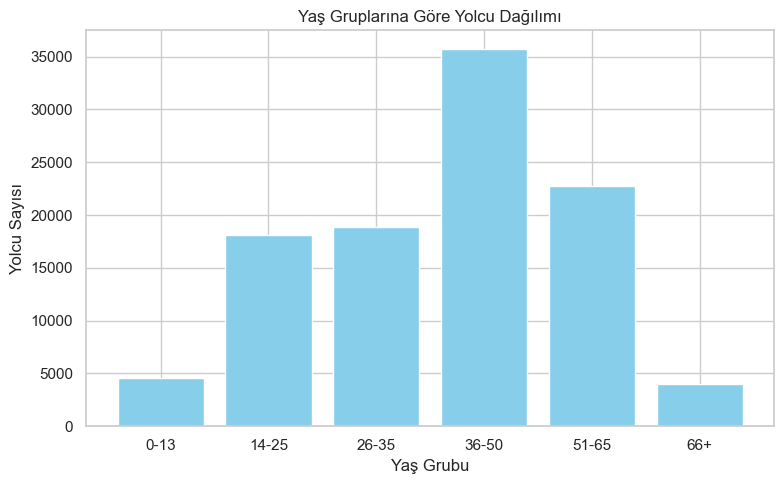

In [360]:
print("YAŞ GRUPLARI ANALİZİ")

if 'Age' in df.columns:
    # Yaş grubu aralıkları (0'dan başlar, 100'e kadar)
    df['Age_Group'] = pd.cut(df['Age'],
                             bins=[0, 13, 25, 35, 50, 65, df['Age'].max()],
                             labels=['0-13', '14-25', '26-35', '36-50', '51-65', '66+'],
                             right=True)

    # Her yaş grubundaki yolcu sayısı
    age_group_counts = df['Age_Group'].value_counts().sort_index()
    print(age_group_counts)

    # Görselleştirme
    plt.figure(figsize=(8, 5))
    plt.bar(age_group_counts.index.astype(str), age_group_counts.values, color='skyblue')
    plt.title('Yaş Gruplarına Göre Yolcu Dağılımı')
    plt.xlabel('Yaş Grubu')
    plt.ylabel('Yolcu Sayısı')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

Yaş grubu dağılımı analiz edildiğinde, havayolunun müşteri profilinin 36-50 yaş grubunda yoğunlaştığı görülmektedir. Bu grubu 26-35 ve 51-65 yaş aralıkları takip etmekte, 14-25 yaş grubu ise daha düşük temsil edilmektedir. 65 yaş üstü müşteriler ise en küçük segmenti oluşturmaktadır. Bu dağılım, havayolunun ağırlıklı olarak çalışma çağındaki ve orta yaş grubundaki yolculara hizmet verdiğini göstermektedir.

YAŞ GRUPLARINA GÖRE MEMNUNİYET ORANLARI (%)
satisfaction  neutral or dissatisfied  satisfied
Age_Group                                       
0-13                        86.225956  13.774044
14-25                       68.341625  31.658375
26-35                       62.452250  37.547750
36-50                       46.223878  53.776122
51-65                       48.700471  51.299529
66+                         81.627559  18.372441


<Figure size 1000x600 with 0 Axes>

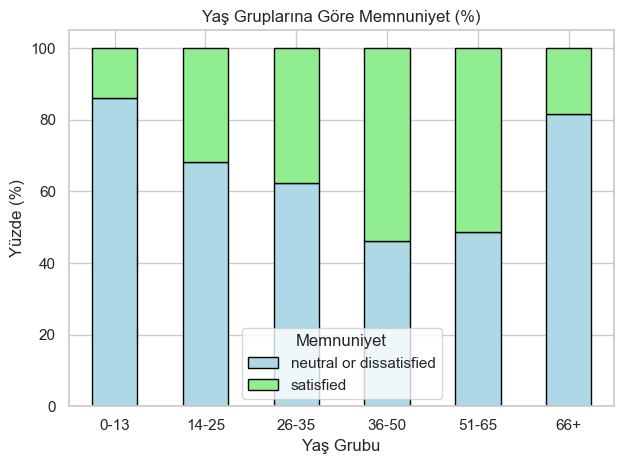

In [362]:
print("YAŞ GRUPLARINA GÖRE MEMNUNİYET ORANLARI (%)")

if 'Age_Group' in df.columns and 'satisfaction' in df.columns:
    # Yüzdelik hesaplama
    sat_by_age = pd.crosstab(df['Age_Group'], df['satisfaction'], normalize='index') * 100
    print(sat_by_age)

    # Renkleri biz seçelim: lightblue & lightgreen
    colors = ['lightblue', 'lightgreen']

    # Grafik
    plt.figure(figsize=(10, 6))
    sat_by_age.plot(kind='bar', stacked=True, color=colors, edgecolor='black')

    plt.title('Yaş Gruplarına Göre Memnuniyet (%)')
    plt.xlabel('Yaş Grubu')
    plt.ylabel('Yüzde (%)')
    plt.legend(title='Memnuniyet')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

Yaş Gruplarına Göre Memnuniyet Analizi

Yaş gruplarına göre memnuniyet analizi, yaşın müşteri memnuniyeti üzerinde önemli bir etkisi olduğunu ortaya koymaktadır. En yüksek memnuniyet oranı 36-50 yaş grubunda (%54) görülürken, bunu 51-65 yaş grubu (%51) takip etmektedir. Dikkat çekici şekilde, en genç ve en yaşlı (65+) müşteri grupları en düşük memnuniyet oranlarını göstermektedir (sırasıyla %28 ve %18). 26-35 yaş grubu da nispeten düşük memnuniyet (%38) sergilemektedir. Bu durum, orta yaş grubundaki müşterilerin havayolu hizmetlerinden daha memnun olduğunu, genç ve yaşlı yolcuların ise farklı beklenti ve ihtiyaçları nedeniyle daha eleştirel yaklaştığını göstermektedir.

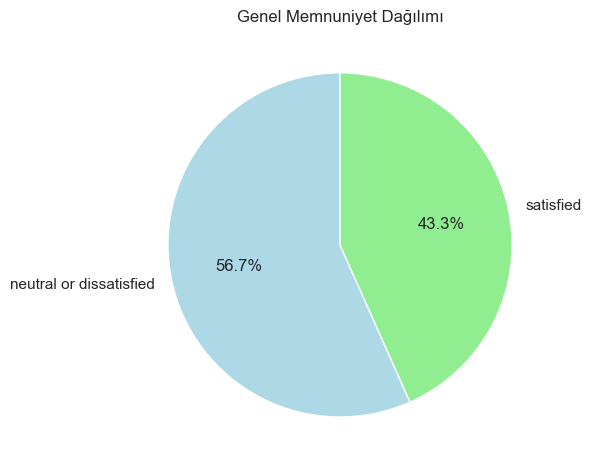

In [364]:
satisfaction_counts = df['satisfaction'].value_counts()

colors = ["lightblue", 'lightgreen']  # Açık mavi ve yeşil

plt.figure(figsize=(6,6))
plt.pie(
    satisfaction_counts,
    labels=satisfaction_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Genel Memnuniyet Dağılımı')
plt.tight_layout()
plt.show()

Grafiğe göre, yolcuların yaklaşık %43.3'ü uçuşlarından memnun, %56.7’si ise memnun değil ya da kararsız.

Bu sonuç, genel memnuniyet oranının düşük olduğunu ve iyileştirilmesi gereken alanlar olduğunu gösteriyor. Özellikle memnun olmayan yolcu oranı %50’yi geçtiği için, hizmet kalitesi veya deneyimle ilgili sorunlar olduğu söylenebilir.

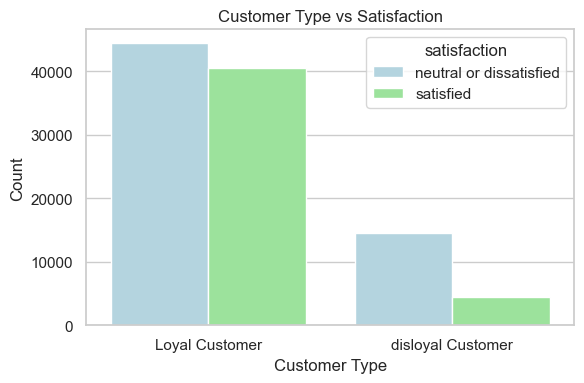

In [366]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Customer Type', hue='satisfaction', palette=["lightblue", "lightgreen"])
plt.title('Customer Type vs Satisfaction')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Customer Type ve Memnuniyet İlişkisi
Grafikten görünene göre Loyal müşteriler, büyük oranda uçuşlarından daha memnun.
Buna karşın disloyal yolcuların çoğu memnun değil ya da kararsız.

Bu durum, müşteri tipinin memnuniyet üzerinde ciddi bir etkisi olduğunu gösteriyor. Loyal müşteriler genellikle daha olumlu deneyim yaşarken, disloyal yolcular daha eleştirel olabilir veya beklentileri karşılanmamış olabilir.

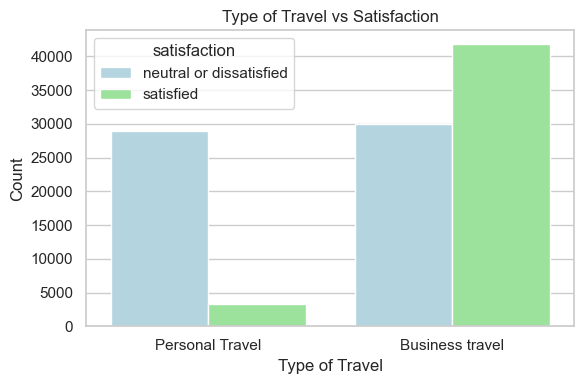

In [368]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', palette=["lightblue", "lightgreen"])
plt.title('Type of Travel vs Satisfaction')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Grafikten görüldüğü üzete, iş seyahati yapan yolcuların memnuniyet oranı, kişisel seyahat edenlere göre çok daha yüksek.
Personal Travel grubunda memnun olmayan yolcu sayısı, memnun olanlardan bariz şekilde fazla.
Bu durum, iş amaçlı uçan yolcuların hizmet beklentilerinin daha fazla karşılandığını veya daha az eleştirel davrandıklarını gösteriyor olabilir.

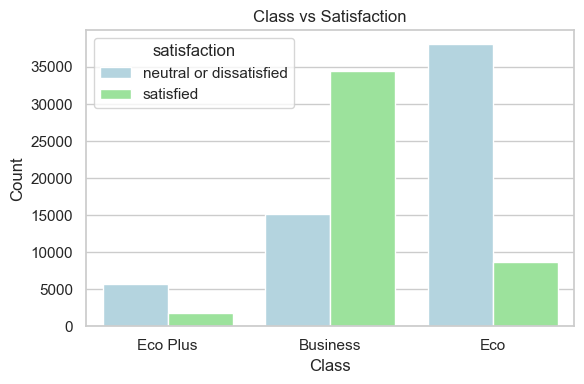

In [370]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class', hue='satisfaction', palette=["lightblue", "lightgreen"])
plt.title('Class vs Satisfaction')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Business Class yolcularının memnuniyet oranı açık ara en yüksek.
Eco ve Eco Plus sınıflarında ise memnuniyetsizlik çok daha yaygın.
Uçuş sınıfı arttıkça hizmet kalitesinin yükselmesi, doğrudan memnuniyete yansımış gibi görünüyor.
Bu grafik, uçuş sınıfının memnuniyet üzerinde oldukça belirleyici olduğunu gösteriyor.

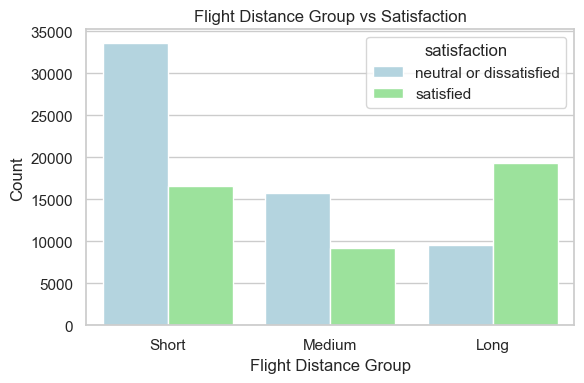

In [372]:
df['Distance Group'] = pd.cut(df['Flight Distance'], 
                              bins=[0, 800, 1600, df['Flight Distance'].max()],
                              labels=['Short', 'Medium', 'Long'])

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Distance Group', hue='satisfaction', palette=["lightblue", "lightgreen"])
plt.title('Flight Distance Group vs Satisfaction')
plt.xlabel('Flight Distance Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Grafikte kısa mesafeli uçuşlarda hem memnun hem memnun olmayan yolcu sayısı yüksek. Ancak memnuniyetsiz yolcu sayısı dikkat çekici şekilde fazla.

Orta mesafeli uçuşlarda yolcu sayısı azalmış olsa da memnuniyet oranı görece dengeli.
En dikkat çekici durum ise uzun uçuşlarda: Memnun olan yolcu sayısı, memnun olmayanlara göre daha fazla.

Bu durum, uzun mesafeli uçuşlarda hizmet kalitesinin daha iyi karşılanması ya da yolcuların beklentisinin daha iyi yönetilmesiyle açıklanabilir.

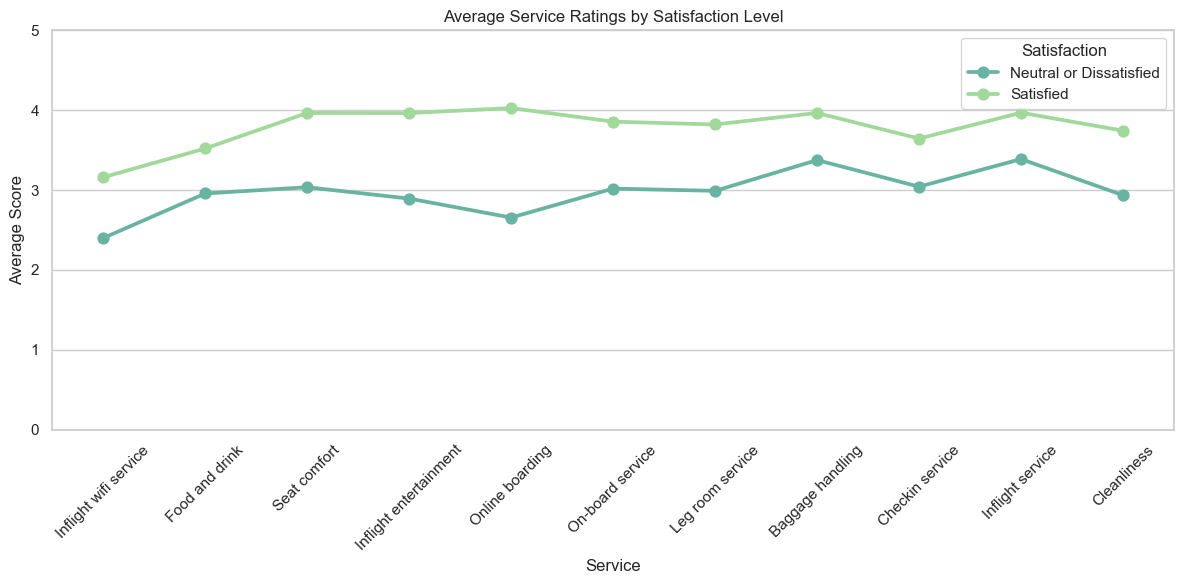

In [374]:
service_cols = [
    'Inflight wifi service', 'Food and drink', 'Seat comfort',
    'Inflight entertainment', 'Online boarding', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Inflight service', 'Cleanliness'
]

# Ortalama skorları hesapla
mean_scores = df.groupby('satisfaction')[service_cols].mean().T.reset_index()
mean_scores.columns = ['Service', 'Neutral or Dissatisfied', 'Satisfied']

# Uzun formata çevir
mean_scores = pd.melt(mean_scores, id_vars='Service', var_name='Satisfaction', value_name='Average Score')

# Doğru eşleşen renkler
palette = {
    'Neutral or Dissatisfied': '#69b3a2',  # Açık mavi
    'Satisfied': '#a1d99b'                # Yeşil
}

# Grafik çizimi
plt.figure(figsize=(12,6))
sns.pointplot(data=mean_scores, x='Service', y='Average Score', hue='Satisfaction', palette=palette)
plt.title('Average Service Ratings by Satisfaction Level')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


Bu grafikte, uçuş sonrasında memnun olan ve olmayan yolcuların, her bir hizmete verdikleri ortalama puanlar karşılaştırılıyor.

Genel olarak memnun olanlar, beklenildiği üzere her hizmet için daha yüksek puan vermiş. Özellikle seat comfort, online boarding ve inflight entertainment gibi hizmetlerde bu fark oldukça belirgin. Bu da, bu hizmetlerin memnuniyet üzerinde daha fazla etkili olduğunu gösteriyor.

Diğer yandan, inflight wifi service her iki grup için de daha düşük puan almış. Yani genel olarak yolcuların en az memnun kaldığı hizmet bu olabilir.

Bu grafik, müşteri memnuniyetini neyin etkilediğini görmek ve hangi hizmetlerde iyileştirme yapılması gerektiğini anlamak faydalı olabilir.

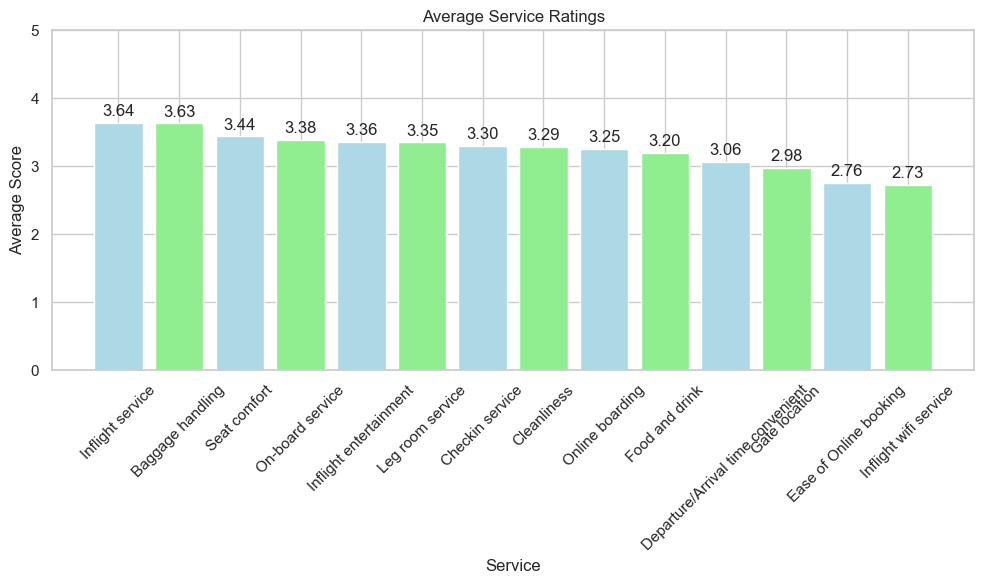

In [376]:
rating_cols = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) <= 6 and min(unique_vals) >= 0 and max(unique_vals) <= 5:
            rating_cols.append(col)

avg_ratings = df[rating_cols].mean().sort_values(ascending=False)

plot_ratings = avg_ratings[avg_ratings.index != 'Satisfaction_Encoded']

colors = ['lightblue', 'lightgreen'] * (len(plot_ratings) // 2 + 1)

plt.figure(figsize=(10,6))
bars = plt.bar(plot_ratings.index, plot_ratings.values, color=colors[:len(plot_ratings)])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center')

plt.title('Average Service Ratings')
plt.xlabel('Service')
plt.ylabel('Average Score')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


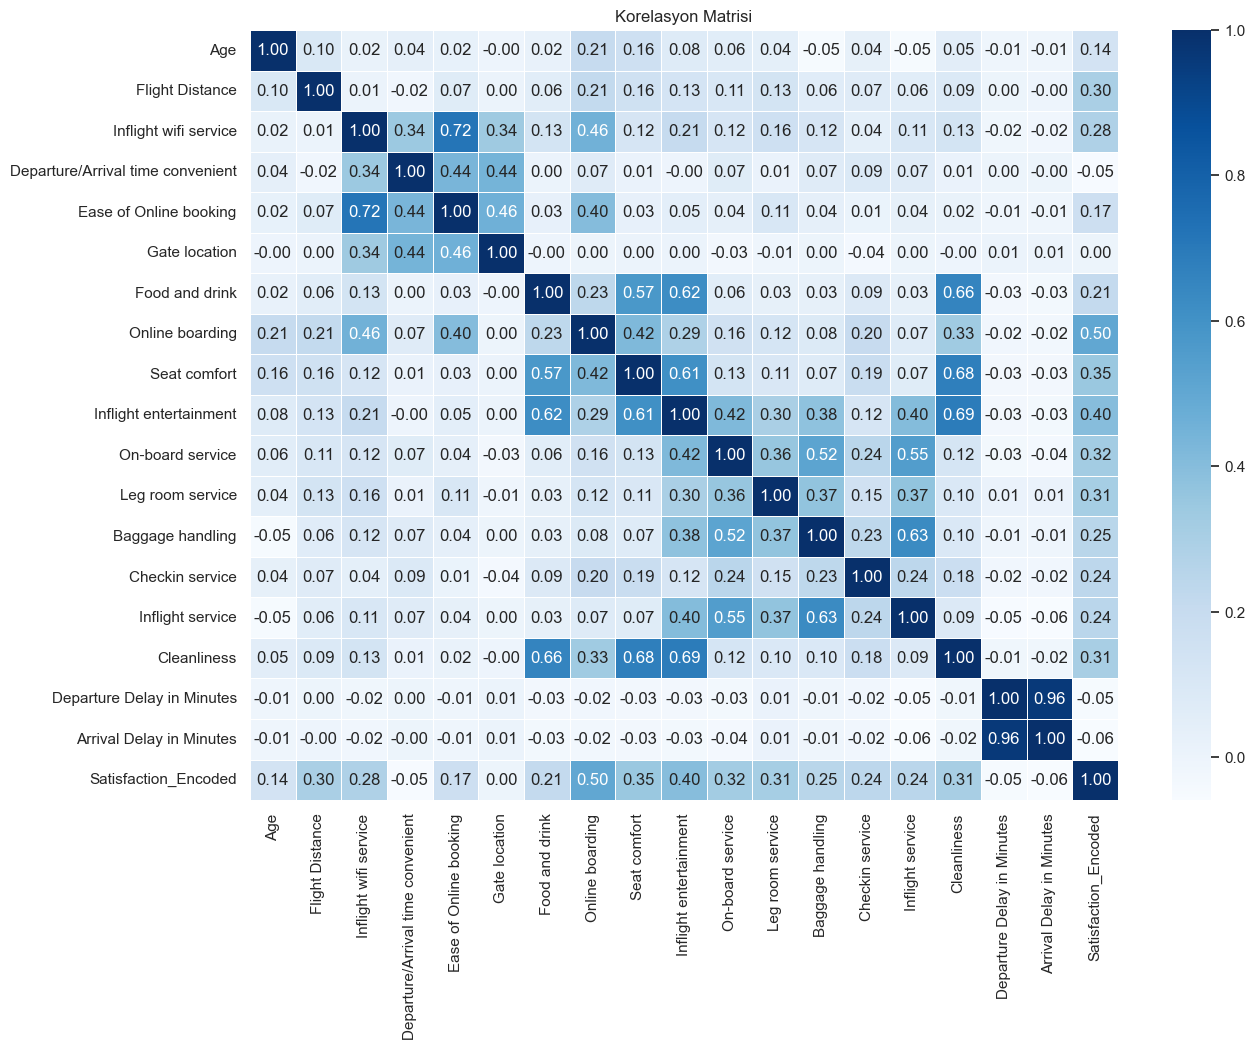

In [377]:
df['Satisfaction_Encoded'] = df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

num_cols = df.select_dtypes(include=['int64', 'float64'])

corr = num_cols.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()


Grafikte sayısal değişkenler arasındaki ilişkiler incelendiğinde, memnuniyet (Satisfaction_Encoded) değişkeniyle en güçlü pozitif korelasyona sahip değişkenlerin başında: Online boarding (0.50), Inflight entertainment (0.40), Seat comfort (0.35), Cleanliness (0.31) geliyor.

Bu, yolcunun uçuş sonrası memnun olmasında bu hizmetlerin önemli etkisi olduğunu gösteriyor.

Diğer yandan, Departure Delay ve Arrival Delay değişkenlerinin memnuniyetle olan ilişkisi neredeyse yok denecek kadar düşük (yaklaşık −0.05). Yani gecikmelerin, yolcunun genel memnuniyetine doğrudan etkisi zayıf kalmış olabilir.

Ayrıca hizmet puanlarının birbirleriyle de yüksek korelasyonlara sahip olması (örneğin inflight entertainment ile seat comfort arasında 0.69 gibi) bu hizmetlerin birlikte iyi ya da kötü algılandığını düşündürüyor.

Bu analiz sayesinde, hangi hizmetlerin memnuniyet üzerinde daha etkili olduğunu sayısal olarak da net biçimde görebiliyoruz.

### Sonuç ve Değerlendirme

Bu proje boyunca havayolu yolcularının memnuniyetini etkileyen faktörler detaylı bir şekilde analiz edilerek çalışma başarıyla tamamlanmıştır. Son aşamada elde edilen bulgular doğrultusunda şu yorumlara ulaşılmıştır:

Sadık Müşteriler Daha Memnun: “Loyal Customer” grubundaki yolcuların memnuniyet oranı belirgin şekilde daha yüksektir. Bu nedenle müşteri sadakatini artıracak kampanya ve programlara ağırlık verilmelidir.

Business Sınıfı Yolcular Daha Memnun, Economy Yolcular Daha Az: Özellikle “Eco” ve “Eco Plus” sınıfındaki yolcuların memnuniyeti oldukça düşüktür. Bu gruplara sunulan hizmetlerin kalitesi artırılmalı, memnuniyetsizliğe neden olan noktalar analiz edilmelidir.

Wi-Fi Hizmeti Kritik Bir Zayıf Nokta: “Inflight wifi service” ortalama puanı diğer hizmetlere göre en düşük seviyededir. Bu hizmetin iyileştirilmesi memnuniyetin artmasına önemli katkı sağlayabilir.

Genç ve Yaşlı Yolcular Daha Az Memnun: 18–25 ve 65+ yaş grupları en düşük memnuniyet oranına sahip. Bu gruplara özel hizmet tasarımları geliştirilebilir.

Uçuş Gecikmeleri Genel Olarak Düşük Ama Uç Değerler Var: Ortalama gecikmeler düşük olsa da, bazı uçuşlarda ciddi gecikmeler gözlenmiştir. Bu uç değerlerin sebepleri incelenmeli ve gerekli önlemler alınmalıdır.

Yorumlar ve analizler doğrultusunda, hem iş stratejilerine yön verecek içgörüler elde edilmiş hem de veri bilimi açısından anlamlı bir analiz süreci tamamlanmıştır.